[<Axes3D: title={'center': 'player_target_state_values'}, xlabel='dealer', ylabel='player', zlabel='Value'>,
 <Axes3D: title={'center': 'player_target_policy_actions'}, xlabel='dealer', ylabel='player', zlabel='Action Index'>,
 <Axes3D: title={'center': 'player_target_state_values'}, xlabel='dealer', ylabel='player', zlabel='Count'>,
 <Axes3D: title={'center': 'player_target_state_values'}, xlabel='dealer', ylabel='player', zlabel='Count'>]

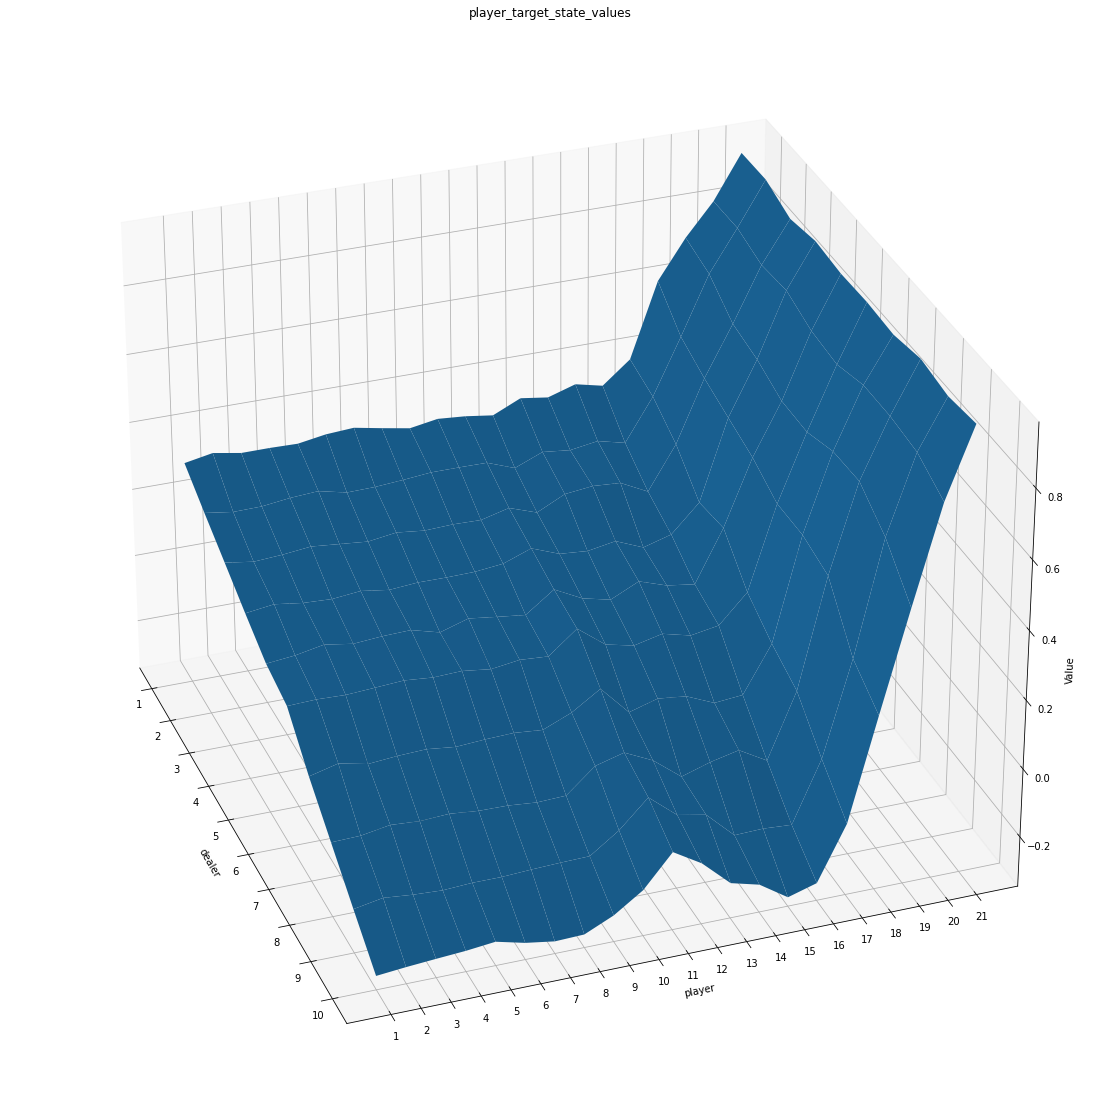

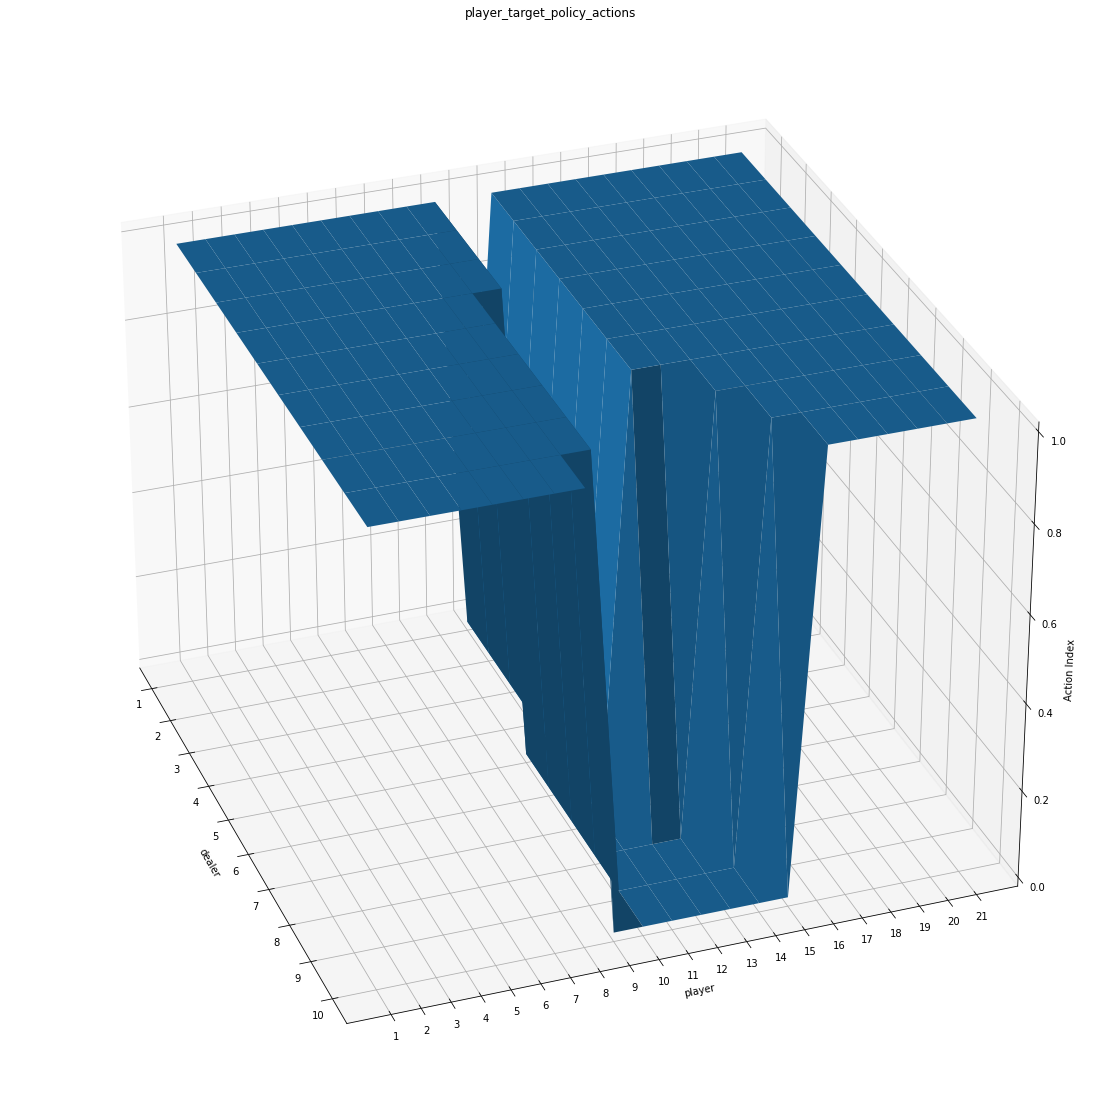

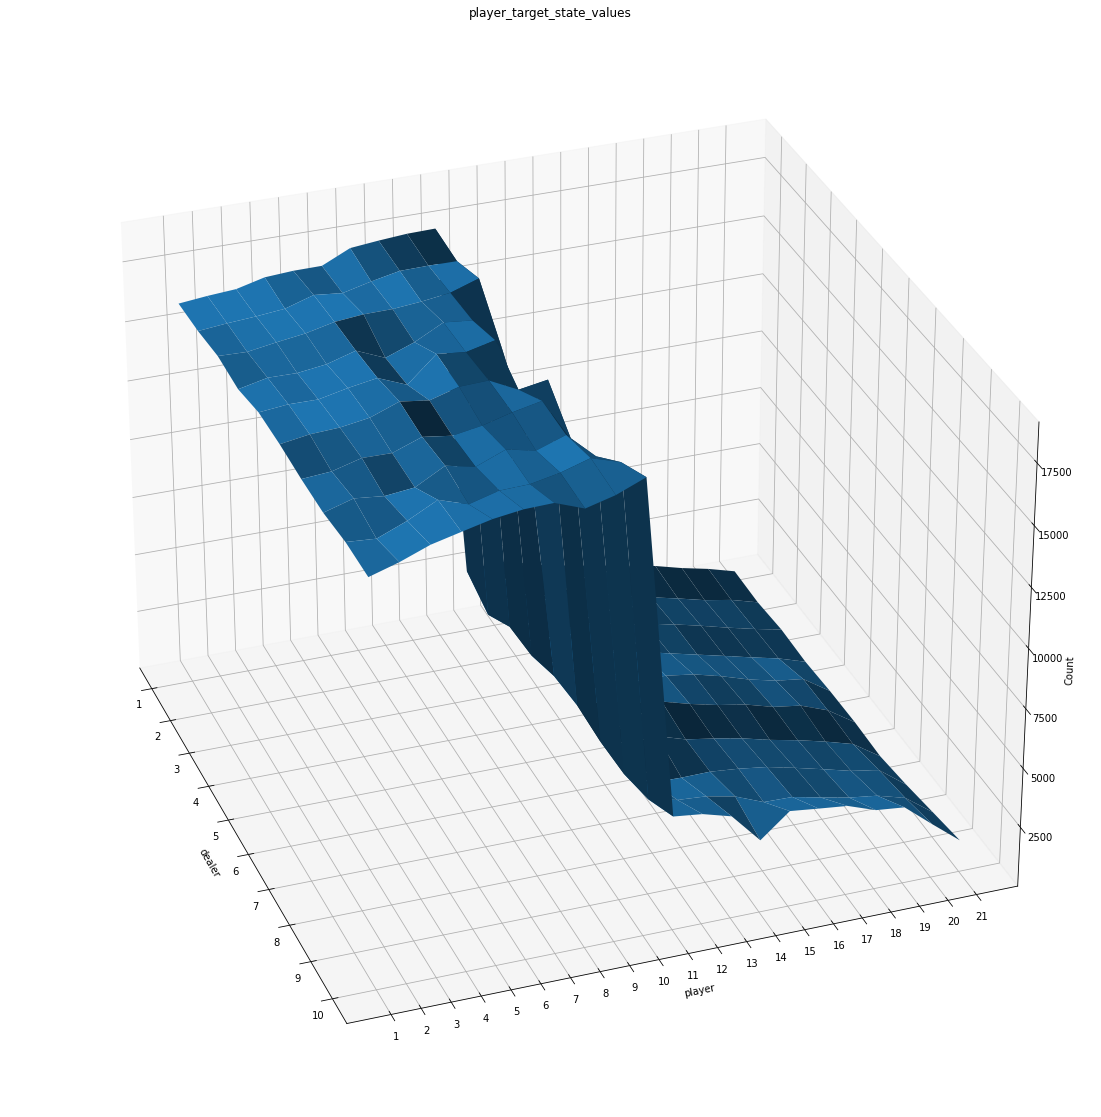

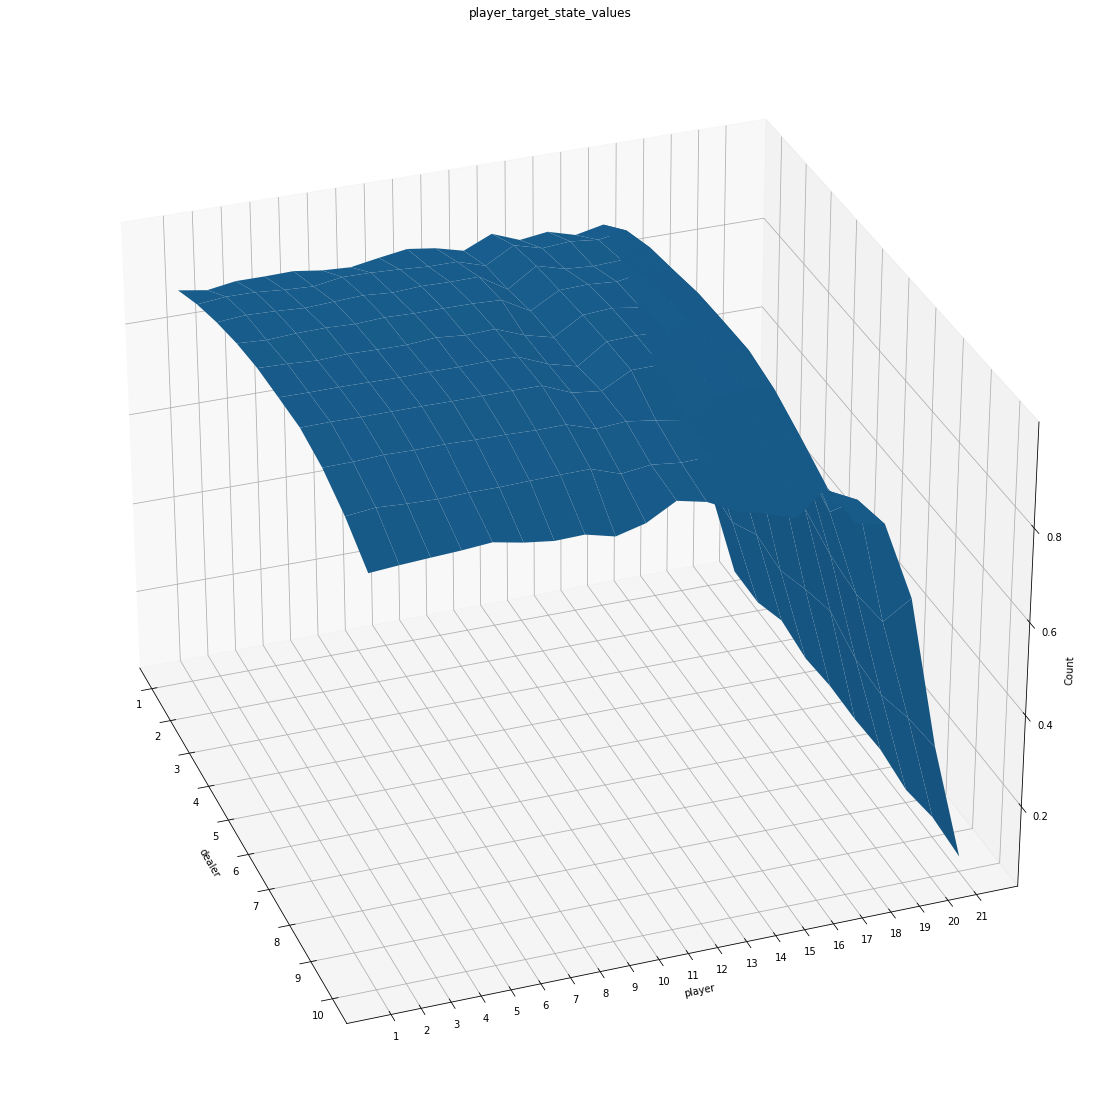

In [2]:
# TASK:
# - combine variance to evaluate certainty of optimal_state_values
# - check sample counts of states to confirm sufficient samples
#
# PROCESS:
# - plot out target_state_value_store on (value, variance, count)
#
# RESULTS:
# - sample counts decrease when (player > 10), drops to ~1/6, average >1e4
# - variance decreases when (player > 16)
# - value increases when (player > 16)
# - value decreases when dealer initial is bigger, but the slope diminishes
#   when (player > 16)
#
# INTERPRETATION:
# - when (player > 10), it is certainly a second step in a sequence
#   player can choose to stick at first step, also it can hit by a negative card.
#   so it is no surprise that (player > 10) appears 6 times more in samples
# - the closer player is to 21, the bigger chance (expectation, variance) player wins
#   when (player > 16), as per the dummy_player_stick_policy,
#   dealer's chance to get closer to 21 decreases with less combination
#   thus player's value increases against smaller dealer initial value (negative risk)
#   variance decreases when getting closer to 21
# - the bigger the initial state of dealer, the bigger chance dealer wins
#   no matter the initial state of player, as it bears the chance to negatively bust
#   when player < 16, still bigger dealer's initial state, bigger chance it wins
#
# %%

import sys

sys.path.append("../")

from src.agent.model_free_agent import ModelFreeAgent

from src.easy_21.game import PLAYER_INFO

PLAYER = ModelFreeAgent("player", PLAYER_INFO)
PLAYER.action_value_store.load("../output/player_true_action_values.json")

PLAYER.plot_2d_target_value_stores(
    view_init=(30, -20),
    count=True,
    variance=True,
)
